# Plotting Data with Matplotlib

Data, be it images or object features, can and must be plotted for a better understanding of their properties or relationships. We already saw that we can use [napari]() to interactively visualize images. Sometimes, we may want to have a static view inside a notebook to consistently share with collaborators or as material in a publication.

Python has many libraries for plotting data, like [matplotlib](https://matplotlib.org/stable/gallery/index.html), [seaborn](https://seaborn.pydata.org/), [plotly](https://plotly.com/python/) and [bokeh](https://docs.bokeh.org/en/latest/docs/gallery.html#standalone-examples), to name a few. Some libraries ship plotting function inside them as a convenience. For example, the pandas method [`.plot`](https://pandas.pydata.org/docs/user_guide/10min.html#plotting) can plot graphs directly from dataframes.

In this notebook, we will explain the basics of [Matplotlib](https://matplotlib.org/stable/gallery/index.html), probably the most flexible and traditional library to display images and data in Python.

Knowing a bit of its syntax help understanding other higher level libraries.

In [1]:
import pandas as pd
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt

## Reading data

In this notebook, we will use an image and a table to plot. Let's read them.

The table contains continuous data from 2 images, identified by the last categorical column 'file_name'.

In [2]:
image1 = imread("../../data/BBBC007_batch/20P1_POS0010_D_1UL.tif")

df = pd.read_csv("../../data/BBBC007_analysis.csv")

In [3]:
df.head(5)

,area,intensity_mean,major_axis_length,minor_axis_length,aspect_ratio,file_name
0,139,96.546763,17.504104,10.292770,1.700621,20P1_POS0010_D_1UL
1,360,86.613889,35.746808,14.983124,2.385805,20P1_POS0010_D_1UL
2,43,91.488372,12.967884,4.351573,2.980045,20P1_POS0010_D_1UL
3,140,73.742857,18.940508,10.314404,1.836316,20P1_POS0010_D_1UL
4,144,89.375000,13.639308,13.458532,1.013432,20P1_POS0010_D_1UL


## Plotting an image with matplotlib

To start, we briefly recap how we display images. You just need a single line:

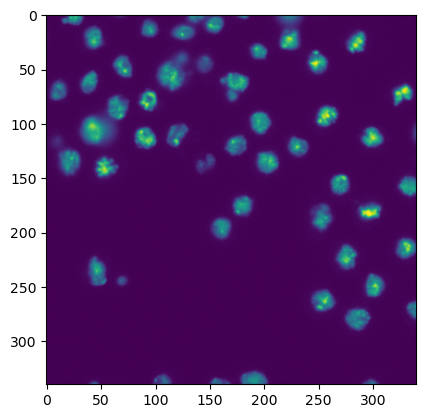

In [4]:
plt.imshow(image1)

## Plotting a graph with matplotlib

To plot a graph with matplotlib, like a scatter plot, we need to get the data from the table and feed it to `plt.scatter`.

Let's plot the aspect_ratio vs mean_intensity.

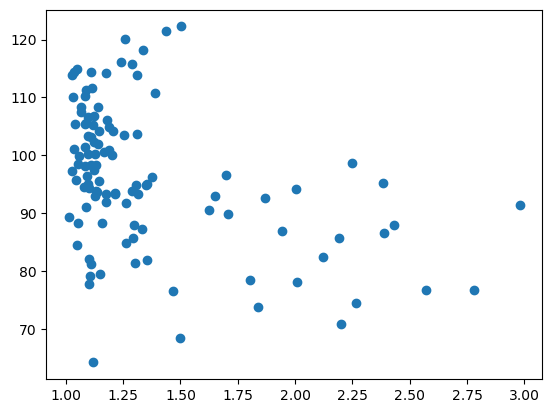

In [5]:
x = df['aspect_ratio']
y = df['intensity_mean']

plt.scatter(x, y)

In a similar fashion, it is possible to provide extra arguments to customize plots like this. Below, we change the marker [symbol](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers), marker size (`s`), color and make marker half transparent (`alpha`). 

Text(0.5, 1.0, 'Aspect Ratio vs. Intensity')

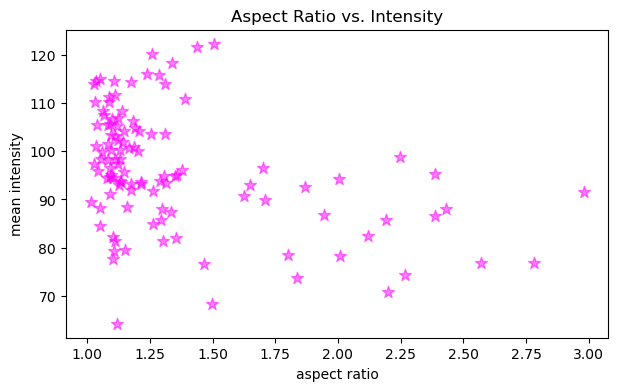

In [6]:
fig, ax = plt.subplots(figsize=(7,4))
ax.scatter(x, y, color='magenta', marker='*', s=80, alpha=0.5)
ax.set_xlabel('aspect ratio')
ax.set_ylabel('mean intensity')
ax.set_title('Aspect Ratio vs. Intensity')

## Configuring figure and axes

Besides plotting graphs as shown above, we usually want to furhter configure the figure and its axes, like provide the names to the axes, change the figure size and maybe have more than one plot in the same figure.

To be able to do all that and more, it is necessary to have handles: variables that represent the figure and the axes objects. We can have access to them by, before plotting, creating an empty figure with the function `plt.subplots`.

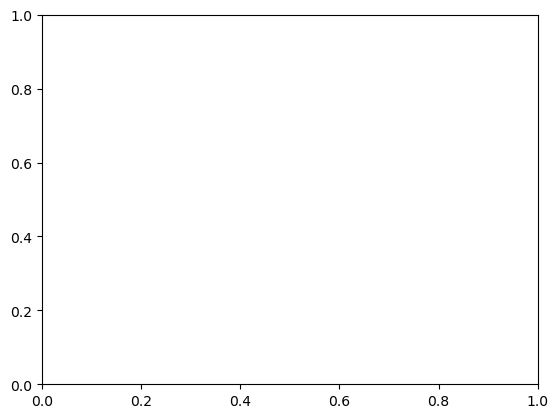

In [7]:
fig, ax = plt.subplots()

Let's add our plot to this new figure. We now do that by passing the `scatter` function as an axes method.

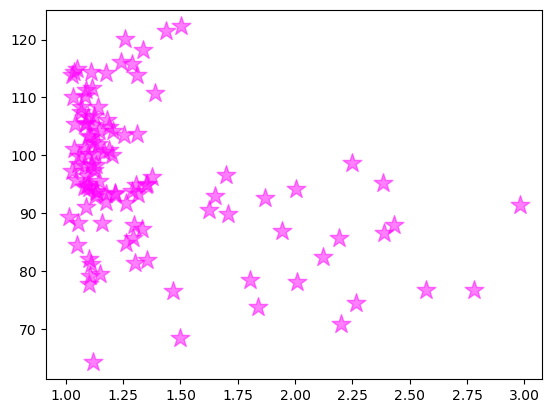

In [8]:
fig, ax = plt.subplots()
ax.scatter(x, y, color = 'magenta', marker = '*', s = 200, alpha = 0.5)

OK, we got the same figure back, so what?

The difference is that now we have access to the figure handles! This adds a lot of editability.

Let's give axes proper names, put a title and increase the figure size.

*Note: the default figure size is [6.4, 4.8] inches (width, height)*

Text(0.5, 1.0, 'Aspect Ratio vs Intensity')

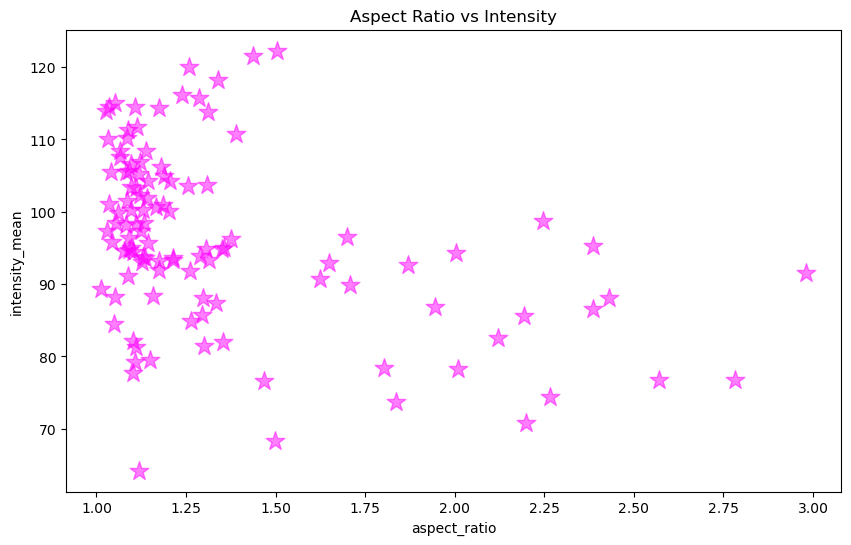

In [9]:
fig, ax = plt.subplots(figsize = [10,6])
ax.scatter(x, y, color = 'magenta', marker = '*', s = 200, alpha = 0.5)
ax.set_xlabel('aspect_ratio')
ax.set_ylabel('intensity_mean')
ax.set_title('Aspect Ratio vs Intensity')

## Subplots

So far we are plotting one image or graph per figure containing all the data.

We could also make a grid plot by providing the number of rows and columns of the grid to `plt.subplots`

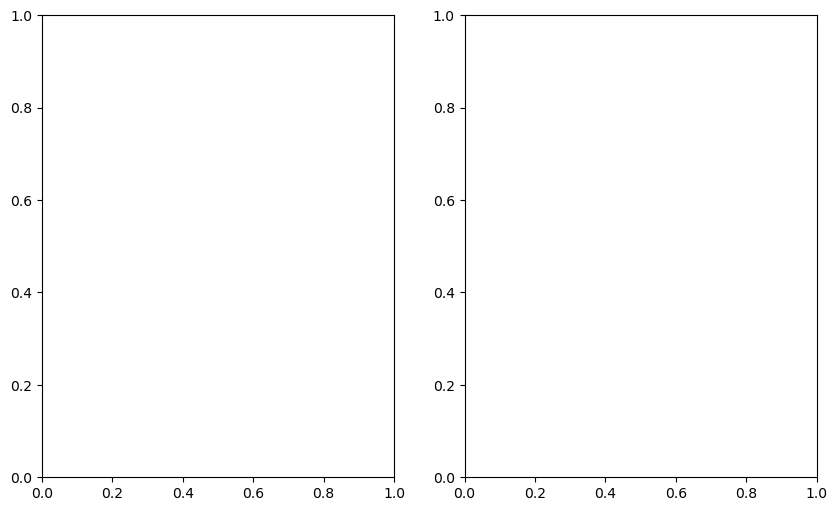

In [10]:
fig, ax = plt.subplots(1,2, figsize = [10,6])

In [11]:
ax

array([<AxesSubplot: >, <AxesSubplot: >], dtype=object)

Now our axes has two elements because we specified 1 row and 2 columns.



Imagine each file was a different experimental group. We can now plot the same relationship, separated by image file on different axes, but in the same figure. 

First, we get data separated by 'file_name'. 

In [12]:
# Aspect ratio and intensity where 'file_name' equals first file name
x1 = df[df['file_name'] == '20P1_POS0010_D_1UL']['aspect_ratio']
y1 = df[df['file_name'] == '20P1_POS0010_D_1UL']['intensity_mean']

# Aspect ratio and intensity where 'file_name' equals second file name
x2 = df[df['file_name'] == '20P1_POS0007_D_1UL']['aspect_ratio']
y2 = df[df['file_name'] == '20P1_POS0007_D_1UL']['intensity_mean']

Then, specify an index to the axes to indicate which axis will get the plot.

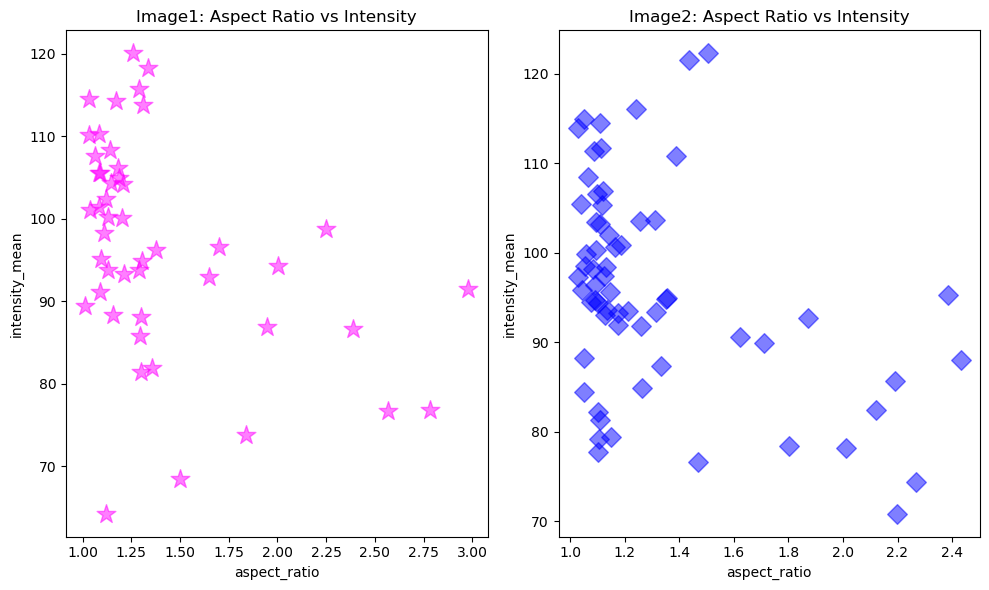

In [13]:
# Get major_axis_length from table
major_axis_length = df['major_axis_length']
# Create empty figure and axes grid
fig, ax = plt.subplots(1,2, figsize = [10,6])
# Configure plot and properties of first axis
ax[0].scatter(x1, y1, color = 'magenta', marker = '*', s = 200, alpha = 0.5)
ax[0].set_xlabel('aspect_ratio')
ax[0].set_ylabel('intensity_mean')
ax[0].set_title('Image1: Aspect Ratio vs Intensity')

# Configure plot and properties of second axis
ax[1].scatter(x2, y2, color = 'blue', marker = 'D', s = 100, alpha = 0.5)
ax[1].set_xlabel('aspect_ratio')
ax[1].set_ylabel('intensity_mean')
ax[1].set_title('Image2: Aspect Ratio vs Intensity')

# Hint: this command in the end is very useful when axes labels overlap
plt.tight_layout()

# Introduction to Seaborn

The definition of seaborn's website is so concise that we replicate it here:

"Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures."

That's it! The main benefit of using it is that it is a more high-level library, which means we can achieve sophisticated plots with much less lines of code. Most axes style customization are done automatically. It can automatically provide plots with summary statistics.

In [14]:
import seaborn as sns

We will apply the seaborn default theme, but you can choose others [here](https://seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles).

In [15]:
sns.set_theme(style="ticks")

## Scatter plots with seaborn

Let's load the same dataframe.

In [16]:
df = pd.read_csv("../../data/BBBC007_analysis.csv")
df.head()

,area,intensity_mean,major_axis_length,minor_axis_length,aspect_ratio,file_name
0,139,96.546763,17.504104,10.292770,1.700621,20P1_POS0010_D_1UL
1,360,86.613889,35.746808,14.983124,2.385805,20P1_POS0010_D_1UL
2,43,91.488372,12.967884,4.351573,2.980045,20P1_POS0010_D_1UL
3,140,73.742857,18.940508,10.314404,1.836316,20P1_POS0010_D_1UL
4,144,89.375000,13.639308,13.458532,1.013432,20P1_POS0010_D_1UL


And make a scatter plot of aspect_ratio vs intensity mean.

<AxesSubplot: xlabel='aspect_ratio', ylabel='intensity_mean'>

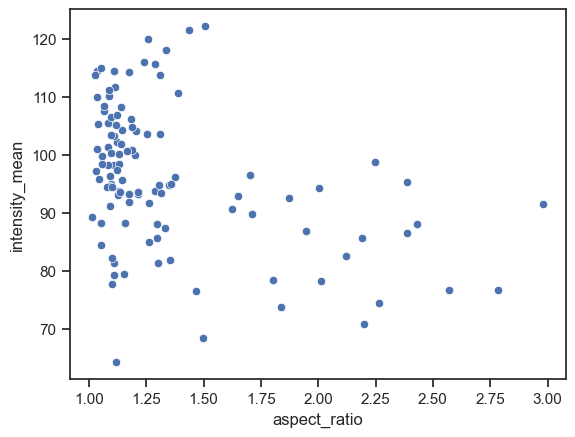

In [17]:
sns.scatterplot(data=df, x="aspect_ratio", y="intensity_mean")

We can already embbed and visualize other features by providing a few extra arguments.

<AxesSubplot: xlabel='aspect_ratio', ylabel='intensity_mean'>

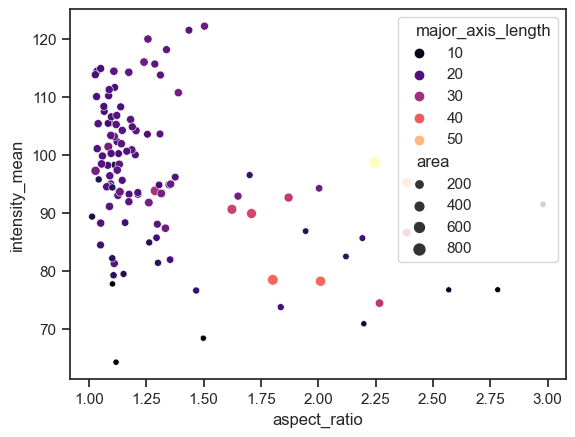

In [18]:
sns.scatterplot(data=df, x="aspect_ratio", y="intensity_mean", size="area", hue="major_axis_length", palette='magma')

## Scatter plots with subplots

The `scatterplot` function is an axes-level function. This means, if we want to add subplots, we also need to create figure and axes from matplotlib first and pass the axes handles. That's when knowing some matplotlib syntax may be handy!

However, seaborn also has figure-level functions, where the subplots are also just an argument.

In the example below, we use the `relplot` function (from *relationship*) and separate the files by providing 'file_name' to the argument `col`,

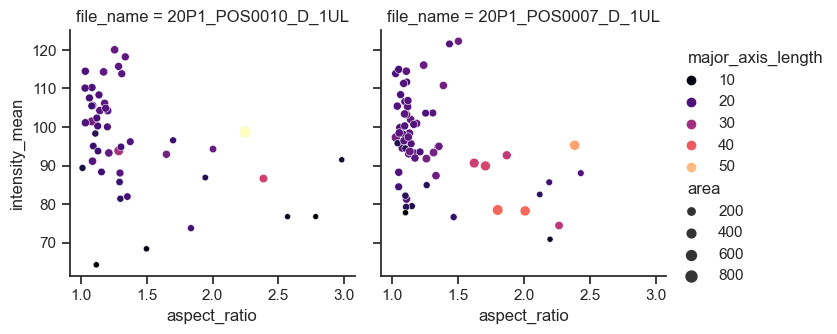

In [19]:
sns.relplot(data=df, x="aspect_ratio", y="intensity_mean", size="area", hue="major_axis_length", col="file_name", palette='magma', height=3.5, aspect=1)

## Adding a line regression model

There are two functions to make a scatter plot with a line regression model: `regplot` and `lmplot`. As before, `regplot` is an axes-level funtion while `lmplot` is a figure-level function.

Let's plot an example of each of them

<AxesSubplot: xlabel='aspect_ratio', ylabel='intensity_mean'>

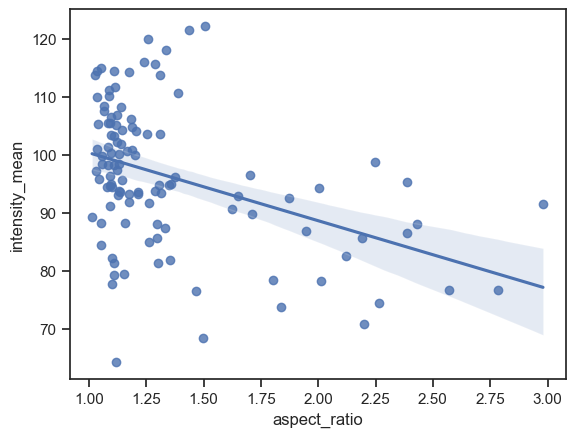

In [20]:
sns.regplot(data=df, x="aspect_ratio", y="intensity_mean")

### Line Regression with subplots

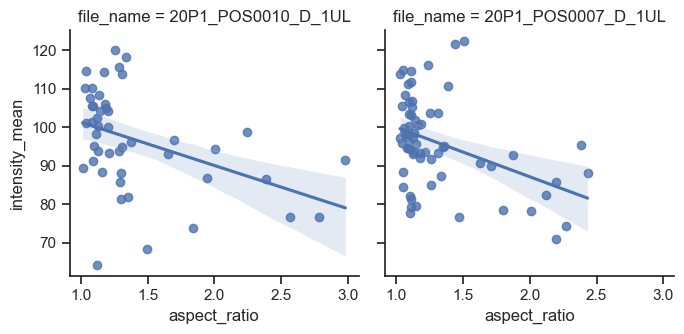

In [21]:
sns.lmplot(data=df, x="aspect_ratio", y="intensity_mean", col="file_name", height=3.5)

# Plotting Distributions with Seaborn

## Boxplots

The axes function for plotting boxplots is `boxplot`.

Seaborn already identified `file_name` as a categorical value and `ìntensity_mean` as a numerical value. Thus, it plots boxplots for the intensity variable. If we invert x and y, we still get the same graph, but as vertical bosplots.

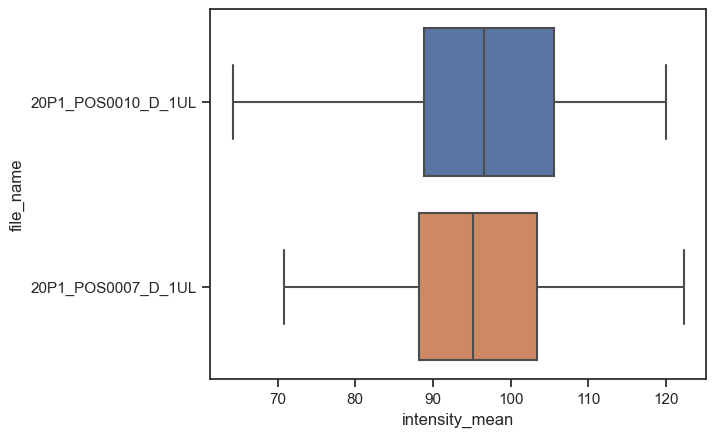

In [22]:
boxplot = sns.boxplot(data=df, x="intensity_mean", y="file_name")

The figure-level, and more general, version of this kind of plot is `catplot`. We just have to provide `kind` as `box`.

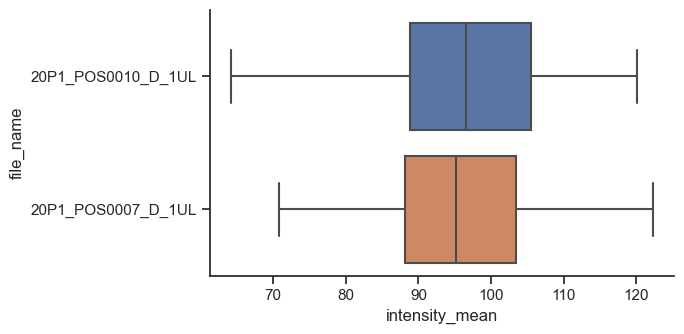

In [23]:
sns.catplot(data=df, 
            x="intensity_mean",
            y="file_name", 
            kind="box",
            height=3.5,
            aspect=2/1)

`catplot` is for many kinds of categorical plots, for example a `strip` plot.

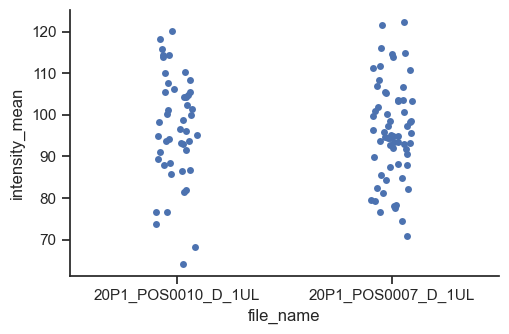

In [24]:
sns.catplot(data=df, x="file_name", y="intensity_mean", kind="strip", height=3.5, aspect=3/2)

## Histograms and Distribution Plots

The axes-level function for plotting histograms is `histplot`.

<AxesSubplot: xlabel='intensity_mean', ylabel='Count'>

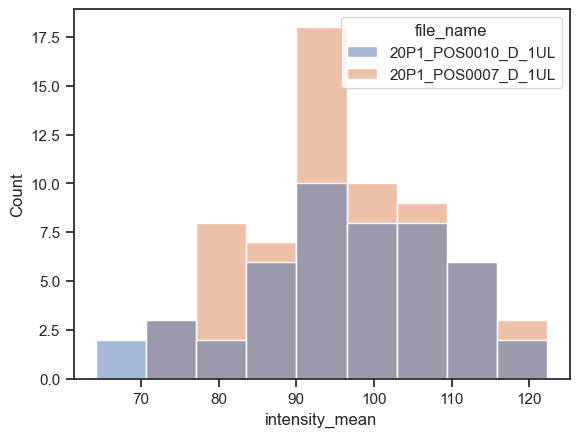

In [25]:
sns.histplot(data=df, x="intensity_mean", hue="file_name")

We can instead plot the kernel density estimation (kde) with `kdeplot` function. Just be careful while interpreting these plots (check some pitfalls [here](https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation-pitfalls))

<AxesSubplot: xlabel='intensity_mean', ylabel='Density'>

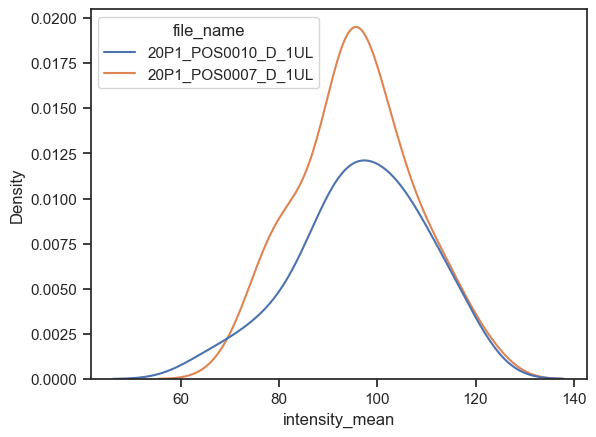

In [26]:
sns.kdeplot(data=df, x="intensity_mean", hue="file_name")

The figure-level function for distributions is `distplot`. With it, you can have histograms and kde in the same plot, or other kinds of plots, like the empirical cumulative distribution function (ecdf).

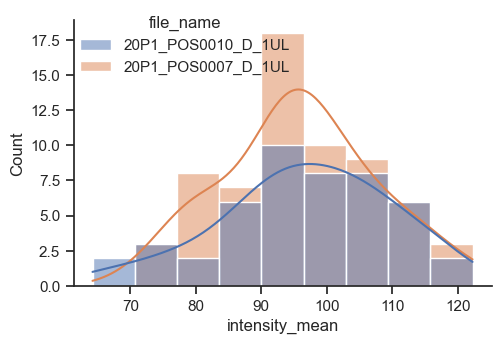

In [27]:
plot = sns.displot(data=df, x="intensity_mean", hue="file_name", kde=True, height=3.5, aspect=3/2)
sns.move_legend(plot, 'upper left', bbox_to_anchor=(0.1,1))

# Multivariate views

In this notebook, we show a few examples of how to have plots with graphs of different types in a figure, like having a scatter plot with marginal distributions or even a multivariate plot with pair relationships of all properties in a table.

Because these plots involve managing subplots, they are all figure-level functions.

## Plotting joint and marginal distributions

To have a joint distribution of two variableswith the marginal distributions on the sides, we can use `jointplot`.

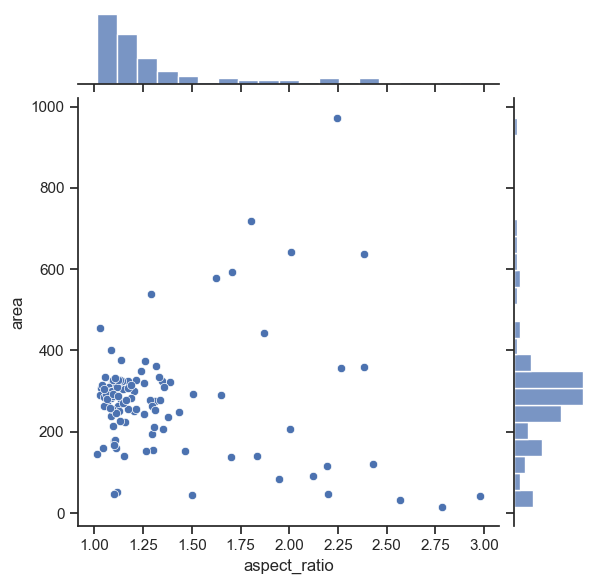

In [28]:
sns.jointplot(data=df, x="aspect_ratio", y="area")

As expected, it is possible to separate groups by passing a categorical property to the `hue` argument. This has an effect on the marginal distribution, turning them from histogram to kde plots.

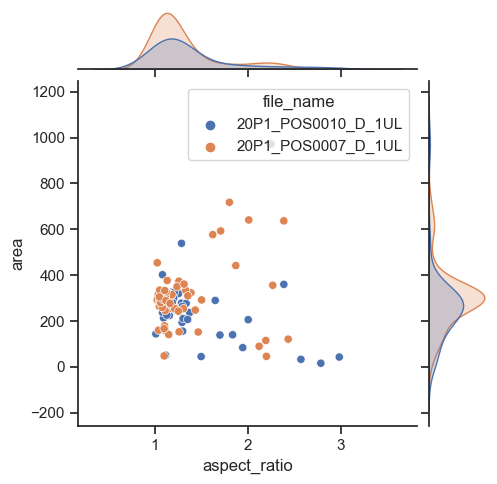

In [29]:
sns.jointplot(data=df, x="aspect_ratio", y="area", hue='file_name', height=5)

## Plotting many distributions at once

The above examples displayed a plot with relationship between two properties. This can be further expanded with the `pairplot` function

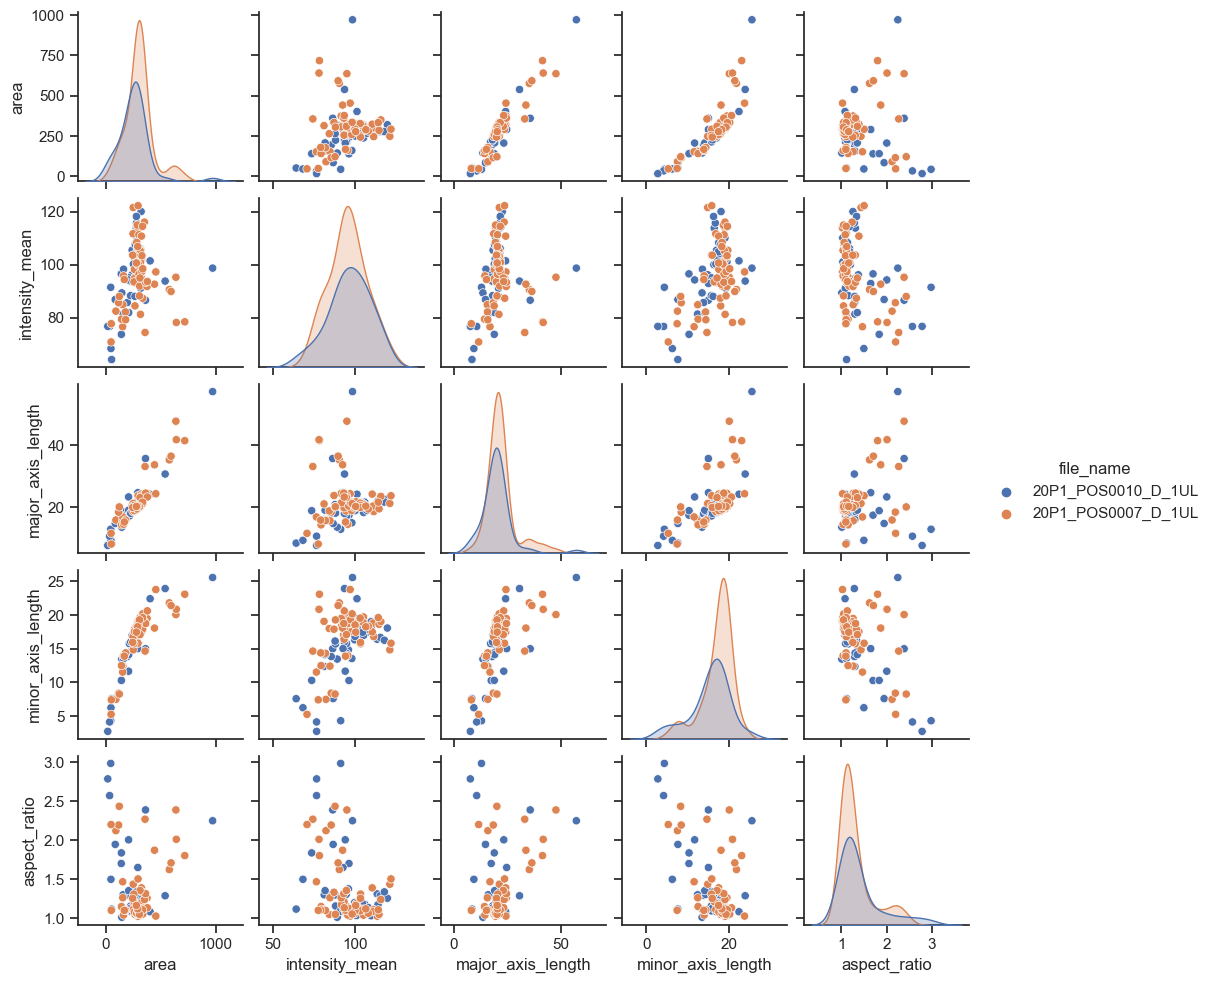

In [30]:
sns.pairplot(data=df, hue="file_name", height=2)

If you have too many points, displaying every single point may yield graphs too poluted. An alternative visualization in this case could be a 2D histogram plot. We can do that by changing the `kind` argument to "hist".

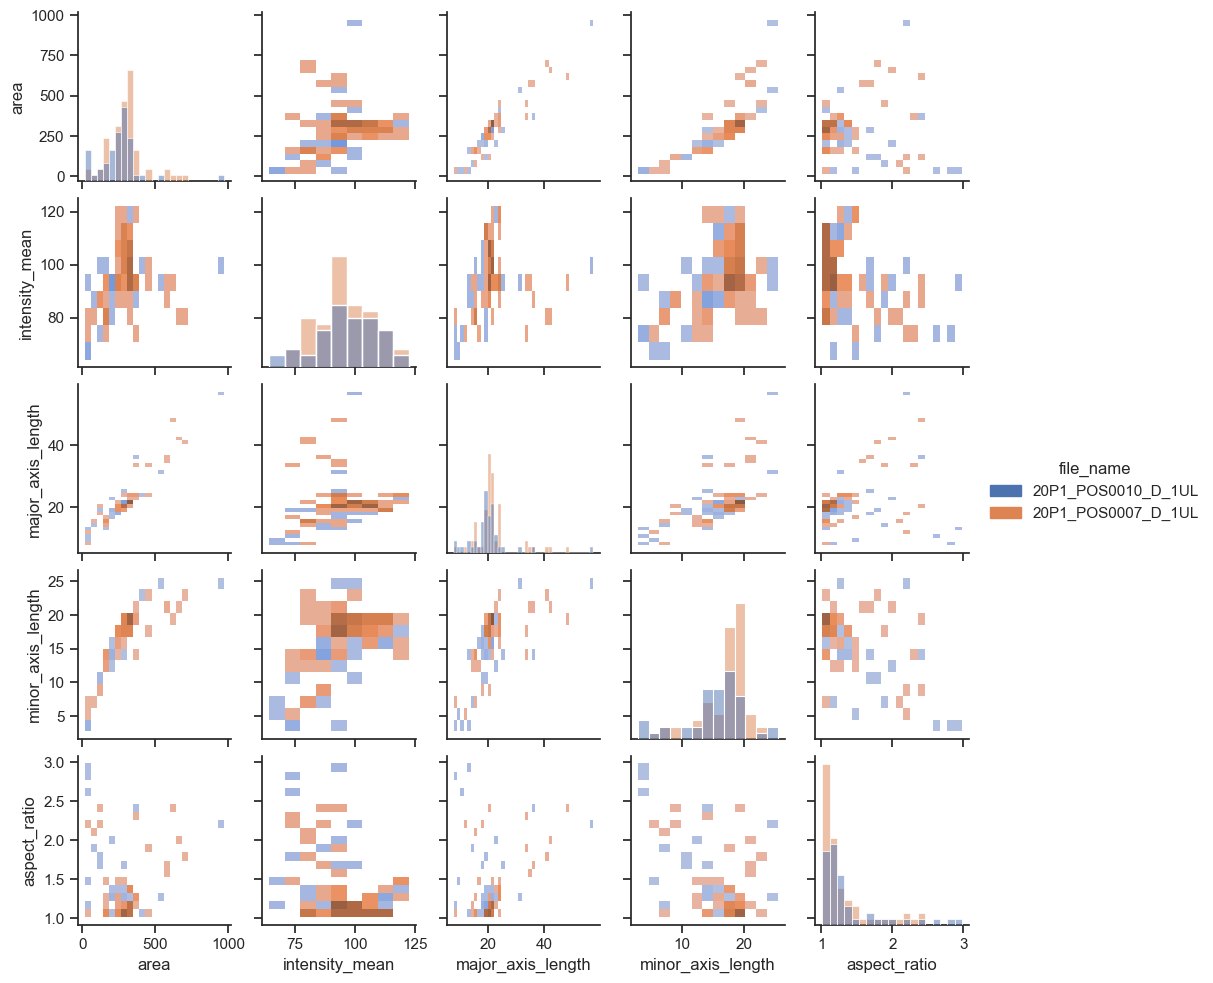

In [31]:
sns.pairplot(data=df, hue="file_name", kind = "hist", height=2)

# Exercises

## Exercise 1

Plot a line regression model on a single plot, with points and lines having different colors according to 'file_name'.

*Hint: use a function that accepts a `hue` argument*

## Exercise 2

Plot two empirical cumulative distribution functions for 'area' from different files on a same graph with different colors.

Repeat this for the property 'intensity_mean' on a second figure. Infer whether you would expect these properties to be different or not.

*Hint: look for the `kind` parameter of `displot`

## Exercise 3

You may have noticed that the `pairplot` is redundant in some plots because the upper diagonal displays the same relationships rotated.

Redraw the `pairplot` to display only the lower diagonal of the plots.

*Hint: explore the properties of the [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot)*

## Exercise 4

Use the following images and the corresponding data:

In [32]:
image1 = imread("../../data/BBBC007_batch/20P1_POS0010_D_1UL.tif")
image2 = imread("../../data/BBBC007_batch/20P1_POS0007_D_1UL.tif")
data = df[ (df['file_name'] == '20P1_POS0010_D_1UL') | (df['file_name'] == '20P1_POS0007_D_1UL')]
data


,area,intensity_mean,major_axis_length,minor_axis_length,aspect_ratio,file_name
0,139,96.546763,17.504104,10.292770,1.700621,20P1_POS0010_D_1UL
1,360,86.613889,35.746808,14.983124,2.385805,20P1_POS0010_D_1UL
2,43,91.488372,12.967884,4.351573,2.980045,20P1_POS0010_D_1UL
3,140,73.742857,18.940508,10.314404,1.836316,20P1_POS0010_D_1UL
4,144,89.375000,13.639308,13.458532,1.013432,20P1_POS0010_D_1UL
...,...,...,...,...,...,...
106,305,88.252459,20.226532,19.244210,1.051045,20P1_POS0007_D_1UL
107,593,89.905565,36.508370,21.365394,1.708762,20P1_POS0007_D_1UL
108,289,106.851211,20.427809,18.221452,1.121086,20P1_POS0007_D_1UL
109,277,100.664260,20.307965,17.432920,1.164920,20P1_POS0007_D_1UL


1. Create figure with two rows and two columns of subplots.
2. Display the two images below in the first row of subplots
3. Display graphs for the corresponding figures on the second row.